In [21]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import f, norm, pearsonr, ttest_rel

# Load data
study_name = "Digital certificates for luxury consumption"
specification_name = "default persona"
human_file = f"{study_name} human data values anonymized.csv"
twin_file = f"{study_name} twins data values anonymized.csv"
df_human = pd.read_csv(human_file, header=0, skiprows=[1, 2])
df_twin = pd.read_csv(twin_file, header=0, skiprows=[1, 2])

# DVs:
df_human["DV1"] = df_human[["DV1_1", "DV1_2", "DV1_3"]].mean(axis=1)
df_twin["DV1"] = df_twin[["DV1_1", "DV1_2", "DV1_3"]].mean(axis=1)
df_human["log_WTP"] = np.log(df_human["WTP"])
df_twin["log_WTP"] = np.log(df_twin["WTP"])

# define relevant columns:
# condition variable names:
condition_vars = ["item"]
# Check if we have a real condition var
if condition_vars and condition_vars[0].strip():
    cond = condition_vars[0]
    cond_h = f"{cond}_human"
    cond_t = f"{cond}_twin"
    cond_exists = True
else:
    cond_exists = False


# raw responses:
raw_vars = [""]
# raw_vars_min = []
# raw_vars_max = []
# #raw responses: domain=social?
# raw_vars_social=[]
# raw_vars_social_map = dict(zip(raw_vars, raw_vars_social))
# #raw responses: domain=cognitive?
# raw_vars_cognitive=[]
# raw_vars_cognitive_map = dict(zip(raw_vars, raw_vars_cognitive))
# #raw responses: replicating know human bias?
# raw_vars_known=[]
# raw_vars_known_map = dict(zip(raw_vars, raw_vars_known))
# #raw responses: preference measure?
# raw_vars_pref=[]
# raw_vars_pref_map = dict(zip(raw_vars, raw_vars_pref))
# #raw responses: stimuli dependent?
# raw_vars_stim=[]
# raw_vars_stim_map = dict(zip(raw_vars, raw_vars_stim))

# DVs:
DV_vars = ["DV1", "log_WTP"]
DV_vars_min = [3, np.nan]
DV_vars_max = [21, np.nan]
# DVs: domain=social?
DV_vars_social = [1, 0]
DV_vars_social_map = dict(zip(DV_vars, DV_vars_social))
# DVs: domain=cognitive?
DV_vars_cognitive = [0] * 2
DV_vars_cognitive_map = dict(zip(DV_vars, DV_vars_cognitive))
# DVs: replicating know human bias?
DV_vars_known = [0] * 2
DV_vars_known_map = dict(zip(DV_vars, DV_vars_known))
# DVs: preference measure?
DV_vars_pref = [0, 1]
DV_vars_pref_map = dict(zip(DV_vars, DV_vars_pref))
# DVs: stimuli dependent?
DV_vars_stim = [1] * 2
DV_vars_stim_map = dict(zip(DV_vars, DV_vars_stim))
# DVs: knowledge question?
DV_vars_know = [0, 0]
DV_vars_know_map = dict(zip(DV_vars, DV_vars_know))
# DVs: political question?
DV_vars_politics = [0] * 2
DV_vars_politics_map = dict(zip(DV_vars, DV_vars_politics))

# merging key
merge_key = ["TWIN_ID"]

# Merge on TWIN_ID
df = pd.merge(df_human, df_twin, on=merge_key, suffixes=("_human", "_twin"))

# Fix dtypes
for var in DV_vars:
    df[f"{var}_human"] = pd.to_numeric(df[f"{var}_human"], errors="coerce")
    df[f"{var}_twin"] = pd.to_numeric(df[f"{var}_twin"], errors="coerce")

# build min/max maps from both raw_vars and DV_vars
min_map = {v: mn for v, mn in zip(DV_vars, DV_vars_min)}
# min_map = {v: mn for v, mn in zip(raw_vars,      raw_vars_min)}
# min_map.update({v: mn for v, mn in zip(DV_vars,   DV_vars_min)})

max_map = {v: mx for v, mx in zip(DV_vars, DV_vars_max)}
# max_map = {v: mx for v, mx in zip(raw_vars,      raw_vars_max)}
# max_map.update({v: mx for v, mx in zip(DV_vars,   DV_vars_max)})

# now add _min and _max columns for every variable in the union
for var in min_map:
    df[f"{var}_min"] = min_map[var]
    df[f"{var}_max"] = max_map[var]

# Compute results
results = []
# for var in raw_vars:
#     ##############################
#     #07/18/26: condition assignment different for each DV.
# #     col_h = f"{var}_human"
# #     col_t = f"{var}_twin"
# #     min_col = f"{var}_min"
# #     max_col = f"{var}_max"
# #     if cond_exists:
# #         cols = [col_h, col_t, cond_h, cond_t,min_col,max_col]
# #     else:
# #         cols = [col_h, col_t,min_col,max_col]
# #     pair = (
# #     df[cols]
# #       .dropna(subset=[col_h, col_t])
# #     )
# # look up the right condition for this DV
#     cond    = dv_to_cond[var]           # e.g. 'condition_green'
#     cond_h  = f"{cond}_human"           # 'condition_green_human'
#     cond_t  = f"{cond}_twin"            # 'condition_green_twin'
#     col_h   = f"{var}_human"
#     col_t   = f"{var}_twin"
#     min_col = f"{var}_min"
#     max_col = f"{var}_max"
#     # always include the matching condition columns
#     cols = [col_h, col_t, cond_h, cond_t, min_col, max_col]
#     pair = df[cols].dropna(subset=[col_h, col_t, cond_h, cond_t])
# ####################################

#     min_val = pair[min_col].iloc[0]
#     max_val = pair[max_col].iloc[0]
#     n    = len(pair)
#     if n >= 4:
#         r, _    = pearsonr(pair[col_h], pair[col_t])
#         z_f     = np.arctanh(r)
#         se      = 1 / np.sqrt(n - 3)
#         z_crit  = norm.ppf(0.975)
#         lo_z, hi_z = z_f - z_crit*se, z_f + z_crit*se
#         lo_r, hi_r = np.tanh(lo_z), np.tanh(hi_z)
#         z_score    = z_f / se
#         # Accuracy = mean absolute diff / range
#         if pd.isna(min_val) or pd.isna(max_val) or max_val == min_val:
#             accuracy = np.nan
#         else:
#             # compute mean absolute difference
#             abs_diff      = np.abs(pair[col_h] - pair[col_t])
#             mean_abs_diff = abs_diff.mean()
#             accuracy      = 1 - mean_abs_diff / (max_val - min_val)

#         mean_h = pair[col_h].mean()
#         mean_t = pair[col_t].mean()

#         # Paired t‐test
#         t_stat, p_val = ttest_rel(pair[col_h], pair[col_t])

#         std_h = pair[col_h].std(ddof=1)
#         std_t = pair[col_t].std(ddof=1)

#          # F‐test for equal variances
#         df1 = df2 = n - 1
#         f_stat = (std_h**2 / std_t**2) if std_t>0 else np.nan

#         # two‐tailed p‐value:
#         if not np.isnan(f_stat):
#             p_f = 2 * min(f.cdf(f_stat, df1, df2),
#                           1 - f.cdf(f_stat, df1, df2))
#         else:
#             p_f = np.nan

#         # Effect sizes (Cohen's d) across conditions
#         #    For humans:
#         if cond_exists and len(pair)>3:
#             levels_h = pair[cond_h].unique()
#             if len(levels_h) == 2:
#                 g1 = pair.loc[pair[cond_h]==levels_h[0], col_h]
#                 g2 = pair.loc[pair[cond_h]==levels_h[1], col_h]
#                 n1, n2 = len(g1), len(g2)
#                 # pooled sd
#                 s_pool = np.sqrt(((n1-1)*g1.var(ddof=1)+(n2-1)*g2.var(ddof=1)) / (n1+n2-2))
#                 d_human = (g1.mean() - g2.mean()) / s_pool if s_pool>0 else np.nan
#             else:
#                 d_human = np.nan
#         else:
#             d_human = np.nan

#         #    For twins:
#         if cond_exists and len(pair)>3:
#             levels_t = pair[cond_t].unique()
#             if cond_exists and len(levels_t) == 2:
#                 g1 = pair.loc[pair[cond_t]==levels_t[0], col_t]
#                 g2 = pair.loc[pair[cond_t]==levels_t[1], col_t]
#                 n1, n2 = len(g1), len(g2)
#                 s_pool = np.sqrt(((n1-1)*g1.var(ddof=1)+(n2-1)*g2.var(ddof=1)) / (n1+n2-2))
#                 d_twin = (g1.mean() - g2.mean()) / s_pool if s_pool>0 else np.nan
#             else:
#                 d_twin = np.nan
#         else:
#             d_twin = np.nan
#     else:
#         r = lo_r = hi_r = z_score = accuracy = mean_h = mean_t = t_stat = p_val = std_h = std_t = f_stat = p_f = np.nan
#         d_human = d_twin = np.nan


#     results.append({
#         'study name': study_name,
#         'variable name': var,
#         'variable type (raw response/DV)':     'raw',
#         'correlation between the responses from humans vs. their twins':        r,
#         'CI_lower': lo_r,
#         'CI_upper': hi_r,
#         'z-score for correlation between humans vs. their twins':  z_score,
#         'accuracy between humans vs. their twins': accuracy,
#         'mean_human': mean_h,
#         'mean_twin': mean_t,
#         'paired t-test t-stat': t_stat,
#         'paired t-test p-value': p_val,
#         'std_human': std_h,
#         'std_twin': std_t,
#         'variance test F-stat': f_stat,
#         'variance test p-value': p_f,
#         'effect size based on human': d_human,
#         'effect size based on twin': d_twin,
#         'domain=social?':raw_vars_social_map.get(var, np.nan),
#         'domain=cognitive?':raw_vars_cognitive_map.get(var, np.nan),
#         'replicating know human bias?':raw_vars_known_map.get(var, np.nan),
#         'preference measure?':raw_vars_pref_map.get(var, np.nan),
#         'stimuli dependent?':raw_vars_stim_map.get(var, np.nan),
#         'sample size':        n
#     })

for var in DV_vars:
    col_h = f"{var}_human"
    col_t = f"{var}_twin"
    min_col = f"{var}_min"
    max_col = f"{var}_max"
    if cond_exists:
        cols = [col_h, col_t, cond_h, cond_t, min_col, max_col]
    else:
        cols = [col_h, col_t, min_col, max_col]
    pair = df[cols].dropna(subset=[col_h, col_t])
    min_val = pair[min_col].iloc[0]
    max_val = pair[max_col].iloc[0]
    n = len(pair)
    if n >= 4:
        r, _ = pearsonr(pair[col_h], pair[col_t])
        z_f = np.arctanh(r)
        se = 1 / np.sqrt(n - 3)
        z_crit = norm.ppf(0.975)
        lo_z, hi_z = z_f - z_crit * se, z_f + z_crit * se
        lo_r, hi_r = np.tanh(lo_z), np.tanh(hi_z)
        z_score = z_f / se
        # Accuracy = mean absolute diff / range
        if pd.isna(min_val) or pd.isna(max_val) or max_val == min_val:
            accuracy = np.nan
        else:
            # compute mean absolute difference
            abs_diff = np.abs(pair[col_h] - pair[col_t])
            mean_abs_diff = abs_diff.mean()
            accuracy = 1 - mean_abs_diff / (max_val - min_val)

        mean_h = pair[col_h].mean()
        mean_t = pair[col_t].mean()

        # Paired t‐test
        t_stat, p_val = ttest_rel(pair[col_h], pair[col_t])

        std_h = pair[col_h].std(ddof=1)
        std_t = pair[col_t].std(ddof=1)

        # F‐test for equal variances
        df1 = df2 = n - 1
        f_stat = (std_h**2 / std_t**2) if std_t > 0 else np.nan
        # two‐tailed p‐value:
        if not np.isnan(f_stat):
            p_f = 2 * min(f.cdf(f_stat, df1, df2), 1 - f.cdf(f_stat, df1, df2))
        else:
            p_f = np.nan

        # Effect sizes (Cohen's d) across conditions
        #    For humans:
        if cond_exists and len(pair) > 3:
            levels_h = pair[cond_h].unique()
            if len(levels_h) == 2:
                g1 = pair.loc[pair[cond_h] == levels_h[0], col_h]
                g2 = pair.loc[pair[cond_h] == levels_h[1], col_h]
                n1, n2 = len(g1), len(g2)
                # pooled sd
                s_pool = np.sqrt(
                    ((n1 - 1) * g1.var(ddof=1) + (n2 - 1) * g2.var(ddof=1)) / (n1 + n2 - 2)
                )
                d_human = (g1.mean() - g2.mean()) / s_pool if s_pool > 0 else np.nan
            else:
                d_human = np.nan
        else:
            d_human = np.nan

        #    For twins:
        if cond_exists and len(pair) > 3:
            levels_t = pair[cond_t].unique()
            if cond_exists and len(levels_t) == 2:
                g1 = pair.loc[pair[cond_t] == levels_t[0], col_t]
                g2 = pair.loc[pair[cond_t] == levels_t[1], col_t]
                n1, n2 = len(g1), len(g2)
                s_pool = np.sqrt(
                    ((n1 - 1) * g1.var(ddof=1) + (n2 - 1) * g2.var(ddof=1)) / (n1 + n2 - 2)
                )
                d_twin = (g1.mean() - g2.mean()) / s_pool if s_pool > 0 else np.nan
            else:
                d_twin = np.nan
        else:
            d_twin = np.nan
    else:
        r = lo_r = hi_r = z_score = accuracy = mean_h = mean_t = t_stat = p_val = std_h = std_t = (
            f_stat
        ) = p_f = np.nan
        d_human = d_twin = np.nan

    results.append(
        {
            "study name": study_name,
            "persona specification": specification_name,
            "variable name": var,
            #        'variable type (raw response/DV)':     'DV',
            "correlation between the responses from humans vs. their twins": r,
            "CI_lower": lo_r,
            "CI_upper": hi_r,
            "z-score for correlation between humans vs. their twins": z_score,
            "accuracy between humans vs. their twins": accuracy,
            "mean_human": mean_h,
            "mean_twin": mean_t,
            "paired t-test t-stat": t_stat,
            "paired t-test p-value": p_val,
            "std_human": std_h,
            "std_twin": std_t,
            "variance test F-stat": f_stat,
            "variance test p-value": p_f,
            "effect size based on human": d_human,
            "effect size based on twin": d_twin,
            "domain=social?": DV_vars_social_map.get(var, np.nan),
            "domain=cognitive?": DV_vars_cognitive_map.get(var, np.nan),
            "replicating know human bias?": DV_vars_known_map.get(var, np.nan),
            "preference measure?": DV_vars_pref_map.get(var, np.nan),
            "stimuli dependent?": DV_vars_stim_map.get(var, np.nan),
            "knowledge question?": DV_vars_know_map.get(var, np.nan),
            "political question?": DV_vars_politics_map.get(var, np.nan),
            "sample size": n,
        }
    )

# results DataFrame
corr_df = pd.DataFrame(results)
print(corr_df)

# save output as csv - unit of observation is comparison between humans and twins:
out_file = f"{study_name} {specification_name} meta analysis.csv"
corr_df.to_csv(out_file, index=False)


#####participant-level data:
def make_long(df, respondent_type):
    # pick off TWIN_ID + the DVs, then melt
    long = df[["TWIN_ID"] + DV_vars].melt(
        id_vars="TWIN_ID", value_vars=DV_vars, var_name="variable_name", value_name="value"
    )
    # only keep non‑NaN values
    long = long.dropna(subset=["value"])

    long["respondent_type"] = respondent_type
    long["study_name"] = study_name
    long["specification_name"] = specification_name
    return long


# build the two halves
long_h = make_long(df_human, "human")
long_t = make_long(df_twin, "twin")

# stack them
df_long = pd.concat([long_h, long_t], ignore_index=True)

print(df_long.head())
# save output as csv - unit of observation is TWIN_ID:
out_file = f"{study_name} {specification_name} meta analysis individual level.csv"
df_long.to_csv(out_file, index=False)

print("done")

                                    study name persona specification  \
0  Digital certificates for luxury consumption       default persona   
1  Digital certificates for luxury consumption       default persona   

  variable name  \
0           DV1   
1       log_WTP   

   correlation between the responses from humans vs. their twins  CI_lower  \
0                                           0.143959              0.064659   
1                                           0.119255              0.039588   

   CI_upper  z-score for correlation between humans vs. their twins  \
0  0.221451                                           3.542033        
1  0.197415                                           2.927751        

   accuracy between humans vs. their twins  mean_human  mean_twin  ...  \
0                                 0.929074    4.735000   4.647222  ...   
1                                      NaN    5.130116   5.854819  ...   

   effect size based on human  effect size based on t

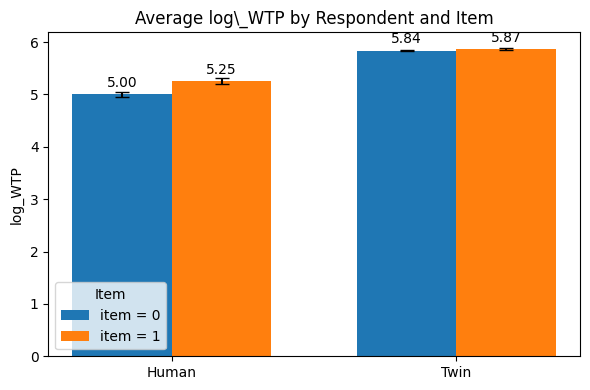

In [22]:
# bar chart for log_WTP

import matplotlib.pyplot as plt
import numpy as np

# define your groups and item‐levels
groups = ["Human", "Twin"]
dataframes = [df_human, df_twin]
items = [0, 1]

# compute means and standard errors
means = np.zeros((2, 2))
sems = np.zeros((2, 2))

for i, df_grp in enumerate(dataframes):
    for j, item_val in enumerate(items):
        vals = df_grp.loc[df_grp["item"] == item_val, "log_WTP"].dropna()
        means[i, j] = vals.mean()
        sems[i, j] = vals.std(ddof=1) / np.sqrt(len(vals))

# plotting
x = np.arange(len(groups))  # array([0, 1])
width = 0.35

fig, ax = plt.subplots(figsize=(6, 4))
bars0 = ax.bar(x - width / 2, means[:, 0], width, yerr=sems[:, 0], capsize=5, label="item = 0")
bars1 = ax.bar(x + width / 2, means[:, 1], width, yerr=sems[:, 1], capsize=5, label="item = 1")

# annotate means above each bar
for bar in list(bars0) + list(bars1):
    h = bar.get_height()
    ax.annotate(
        f"{h:.2f}",
        xy=(bar.get_x() + bar.get_width() / 2, h),
        xytext=(0, 3),  # 3 points vertical offset
        textcoords="offset points",
        ha="center",
        va="bottom",
    )

# labels & legend
ax.set_xticks(x)
ax.set_xticklabels(groups)
ax.set_ylabel("log_WTP")
ax.set_title("Average log\_WTP by Respondent and Item")
ax.legend(title="Item")

plt.tight_layout()
plt.show()

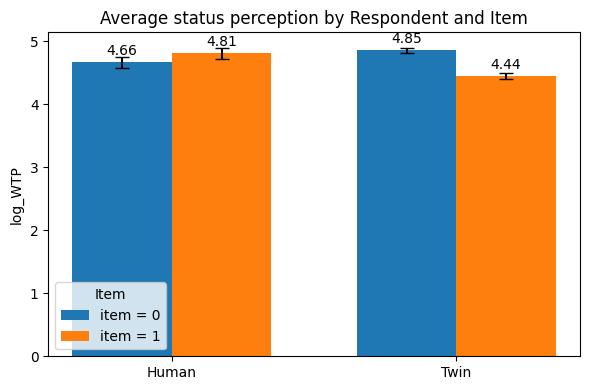

In [23]:
# bar chart for status perception

import matplotlib.pyplot as plt
import numpy as np

# define your groups and item‐levels
groups = ["Human", "Twin"]
dataframes = [df_human, df_twin]
items = [0, 1]

# compute means and standard errors
means = np.zeros((2, 2))
sems = np.zeros((2, 2))

for i, df_grp in enumerate(dataframes):
    for j, item_val in enumerate(items):
        vals = df_grp.loc[df_grp["item"] == item_val, "DV1"].dropna()
        means[i, j] = vals.mean()
        sems[i, j] = vals.std(ddof=1) / np.sqrt(len(vals))

# plotting
x = np.arange(len(groups))  # array([0, 1])
width = 0.35

fig, ax = plt.subplots(figsize=(6, 4))
bars0 = ax.bar(x - width / 2, means[:, 0], width, yerr=sems[:, 0], capsize=5, label="item = 0")
bars1 = ax.bar(x + width / 2, means[:, 1], width, yerr=sems[:, 1], capsize=5, label="item = 1")

# annotate means above each bar
for bar in list(bars0) + list(bars1):
    h = bar.get_height()
    ax.annotate(
        f"{h:.2f}",
        xy=(bar.get_x() + bar.get_width() / 2, h),
        xytext=(0, 3),  # 3 points vertical offset
        textcoords="offset points",
        ha="center",
        va="bottom",
    )

# labels & legend
ax.set_xticks(x)
ax.set_xticklabels(groups)
ax.set_ylabel("log_WTP")
ax.set_title("Average status perception by Respondent and Item")
ax.legend(title="Item")

plt.tight_layout()
plt.show()

In [24]:
# regression for price:

import statsmodels.formula.api as smf

# mark humans vs. twins
df_human["human_vs_AI_dummy"] = 0
df_twin["human_vs_AI_dummy"] = 1

# 1) stack human + twin into one DataFrame
df_all = pd.concat([df_human, df_twin], ignore_index=True)

mask = df_all[["TWIN_ID", "log_WTP", "item"]].isnull().any(axis=1)
# pull out their IDs (and any other columns you like)
dropped_rows = df_all.loc[mask, ["TWIN_ID", "log_WTP", "item"]]
print("These rows will be dropped:\n", dropped_rows)
print("Their TWIN_IDs:", dropped_rows["TWIN_ID"].unique())

df_all = df_all.dropna(subset=["TWIN_ID", "log_WTP", "item"])

# ensure grouping var is categorical
df_all["TWIN_ID"] = df_all["TWIN_ID"].astype("category")

# 2) fit the mixed‑effects model
#    log_WTP ~ human_vs_AI_dummy * item
#    random intercept for TWIN_ID
md = smf.mixedlm("log_WTP ~ human_vs_AI_dummy * item", df_all, groups="TWIN_ID")

mdf = md.fit()

# 3) inspect results
print(mdf.summary())

These rows will be dropped:
 Empty DataFrame
Columns: [TWIN_ID, log_WTP, item]
Index: []
Their TWIN_IDs: []
              Mixed Linear Model Regression Results
Model:                MixedLM    Dependent Variable:    log_WTP   
No. Observations:     1200       Method:                REML      
No. Groups:           600        Scale:                 0.3608    
Min. group size:      2          Log-Likelihood:        -1139.5694
Max. group size:      2          Converged:             Yes       
Mean group size:      2.0                                         
------------------------------------------------------------------
                       Coef.  Std.Err.    z    P>|z| [0.025 0.975]
------------------------------------------------------------------
Intercept               5.004    0.036 138.831 0.000  4.933  5.075
human_vs_AI_dummy       0.832    0.049  16.913 0.000  0.736  0.929
item                    0.251    0.051   4.937 0.000  0.151  0.350
human_vs_AI_dummy:item -0.214    0.0

In [25]:
# regression for status perception:

import statsmodels.formula.api as smf

# mark humans vs. twins
df_human["human_vs_AI_dummy"] = 0
df_twin["human_vs_AI_dummy"] = 1

# 1) stack human + twin into one DataFrame
df_all = pd.concat([df_human, df_twin], ignore_index=True)

mask = df_all[["TWIN_ID", "DV1", "item"]].isnull().any(axis=1)
# pull out their IDs (and any other columns you like)
dropped_rows = df_all.loc[mask, ["TWIN_ID", "DV1", "item"]]
print("These rows will be dropped:\n", dropped_rows)
print("Their TWIN_IDs:", dropped_rows["TWIN_ID"].unique())

df_all = df_all.dropna(subset=["TWIN_ID", "DV1", "item"])

# ensure grouping var is categorical
df_all["TWIN_ID"] = df_all["TWIN_ID"].astype("category")

# 2) fit the mixed‑effects model
#    log_WTP ~ human_vs_AI_dummy * item
#    random intercept for TWIN_ID
md = smf.mixedlm("DV1 ~ human_vs_AI_dummy * item", df_all, groups="TWIN_ID")

mdf = md.fit()

# 3) inspect results
print(mdf.summary())

These rows will be dropped:
 Empty DataFrame
Columns: [TWIN_ID, DV1, item]
Index: []
Their TWIN_IDs: []
              Mixed Linear Model Regression Results
Model:               MixedLM    Dependent Variable:    DV1       
No. Observations:    1200       Method:                REML      
No. Groups:          600        Scale:                 1.2798    
Min. group size:     2          Log-Likelihood:        -1935.0361
Max. group size:     2          Converged:             Yes       
Mean group size:     2.0                                         
-----------------------------------------------------------------
                       Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------
Intercept               4.663    0.070 66.318 0.000  4.525  4.801
human_vs_AI_dummy       0.191    0.093  2.064 0.039  0.010  0.373
item                    0.142    0.099  1.437 0.151 -0.052  0.337
human_vs_AI_dummy:item -0.554    0.131 -4.244 0.000 